In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/heart_v2.csv')

In [ ]:
df.columns


Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [ ]:
df.head()



,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']


Text(0.5, 1.02, 'Pairplot of Features with Hue as Heart Disease')

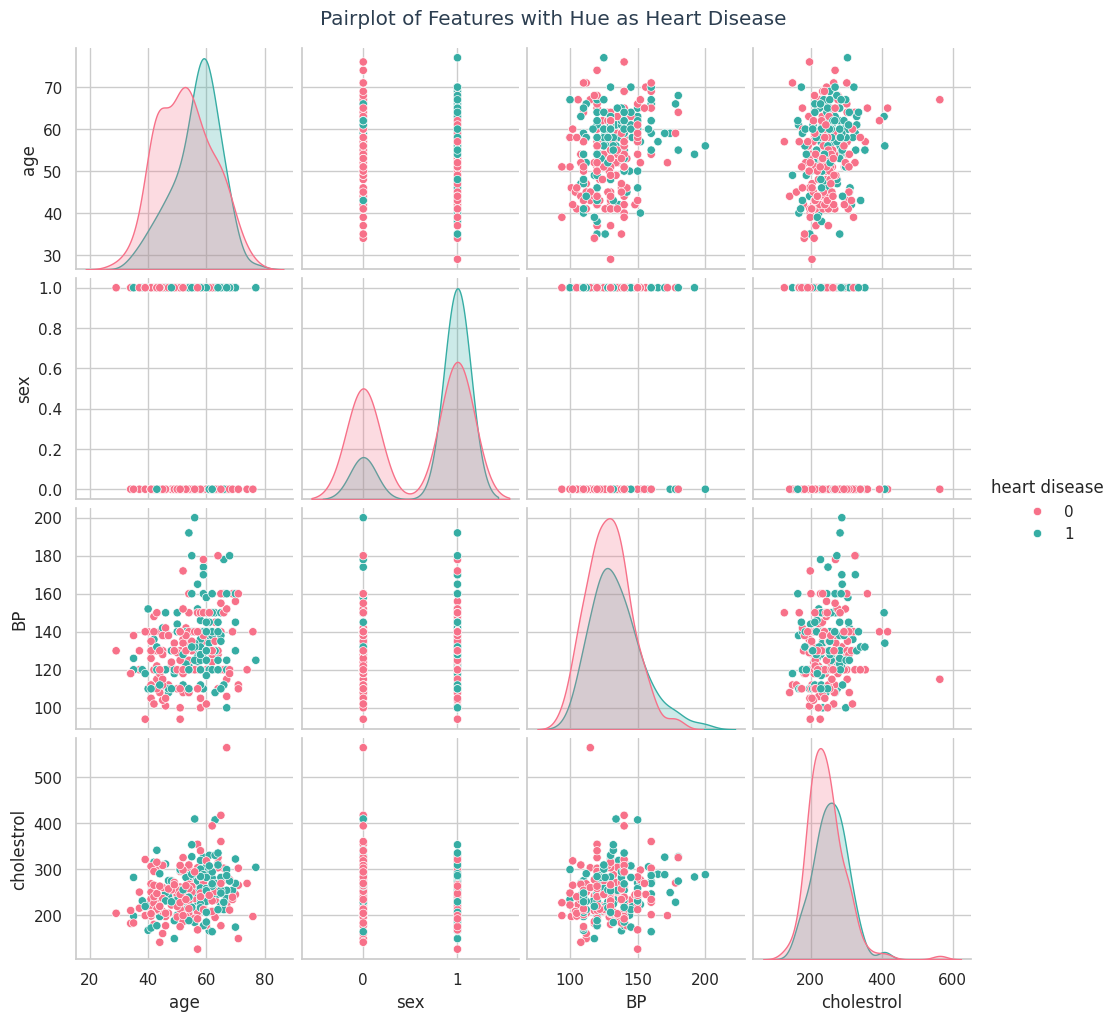

In [ ]:
sns.set_theme(style="whitegrid")
sns.pairplot(df, hue='heart disease', palette='husl')
plt.suptitle('Pairplot of Features with Hue as Heart Disease', y=1.02,
color='#2c3e50')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
!pip install six
!pip install pydotplus


In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

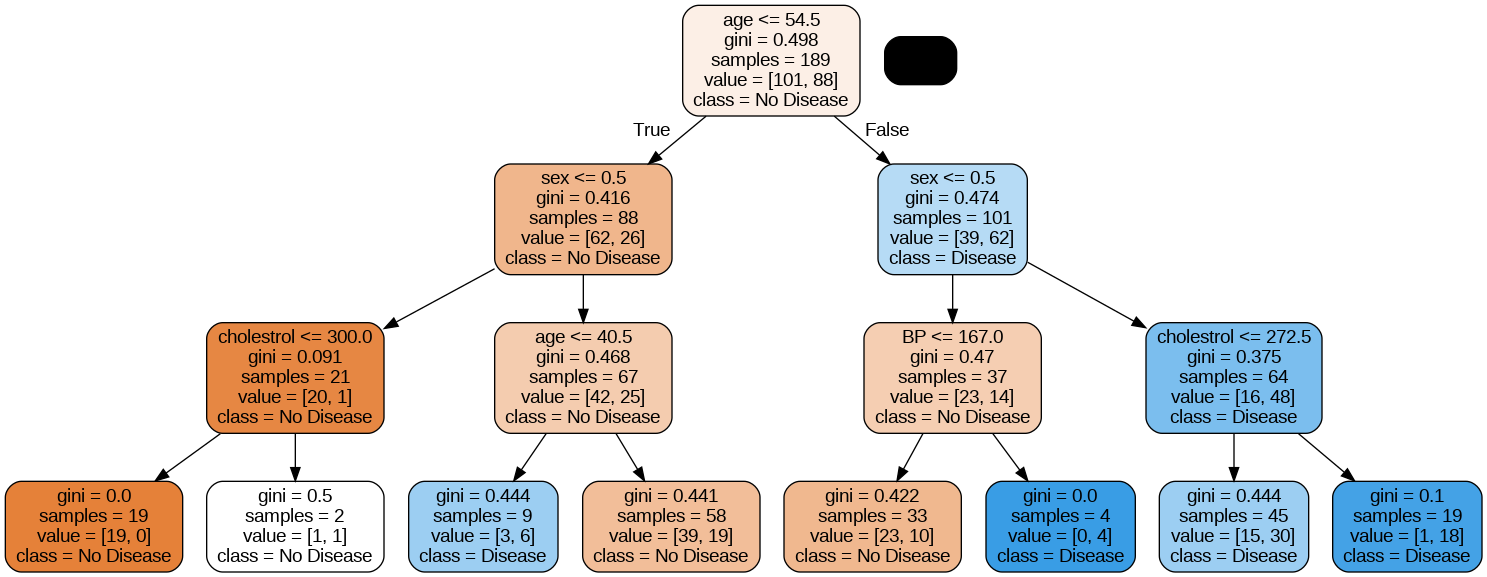

In [ ]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns,
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])